In [1]:
!pip install nibabel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 5.6 MB/s eta 0:00:0000:0100:01


In [2]:
import nibabel as nib

In [6]:
import os

In [30]:
import matplotlib.pyplot as plt

In [35]:
import numpy as np

In [4]:
folder_path = '/Users/skapoor/Desktop/academics/academics_3/DL_MIS/assignment/assingment_3/ACDC/database/training/patient001'

In [7]:
fii_files = [i for i in os.listdir(folder_path) if i.endswith('.nii.gz')]

In [90]:
fii_files[0].split('.')

['patient001_frame01', 'nii', 'gz']

In [79]:
data = nib.load(os.path.join(folder_path,fii_files[1]))

In [80]:
print(data.shape)

(216, 256, 10)


In [133]:
data.shape

(216, 256, 10)

In [81]:
data_array = np.array(data.get_fdata())

In [84]:
train_folder = '/Users/skapoor/Desktop/academics/academics_3/DL_MIS/assignment/assingment_3/ACDC/database/training'

In [160]:
test_folder = '/Users/skapoor/Desktop/academics/academics_3/DL_MIS/assignment/assingment_3/ACDC/database/testing'

In [87]:
database_folder = '/Users/skapoor/Desktop/academics/academics_3/DL_MIS/assignment/assingment_3/ACDC/database'

In [145]:
train_save_files = os.path.join(database_folder,'train_files')
test_save_files = os.path.join(database_folder,'test_files')

In [147]:
os.mkdir(train_save_files)
os.mkdir(test_save_files)

In [131]:
def pair_strings_with_postfix(input_list):
    paired_strings = {}  # Initialize an empty dictionary to store paired strings

    for file in input_list:
        if file.endswith('_gt'):
            #print(file)
            paired_strings[file[:-3]] = file
    return paired_strings

In [150]:
from tqdm import tqdm

In [157]:
os.isdir?

Object `os.isdir` not found.


In [158]:
for folder in tqdm(os.listdir(train_folder)):
    
    folder_path = os.path.join(train_folder,folder)
    if os.path.isdir(folder_path) == False:
        continue
    files = [i.split('.')[0] for i in os.listdir(folder_path) if i.endswith('.nii.gz')]
    dic_local = pair_strings_with_postfix(files)
    for key,value in dic_local.items():
        image_path = os.path.join(folder_path,key+'.nii.gz')
        label_path = os.path.join(folder_path,value + '.nii.gz')
        images = np.array(nib.load(image_path).get_fdata())
        labels = np.array(nib.load(label_path).get_fdata())
        _,_,z = labels.shape
        for i in range(z):
            image = np.expand_dims(images[:,:,i],axis = 0)
            label = np.expand_dims(labels[:,:,i],axis = 0)
            gg = np.concatenate([image,label],axis = 0)
            #print(gg.shape)
            
            file_save_path = os.path.join(train_save_files,key+'_'+str(i)+'.npy')
            np.save(file_save_path,gg)

100%|█████████████████████████████████████████| 102/102 [00:13<00:00,  7.32it/s]


In [161]:
for folder in tqdm(os.listdir(test_folder)):
    
    folder_path = os.path.join(test_folder,folder)
    if os.path.isdir(folder_path) == False:
        continue
    files = [i.split('.')[0] for i in os.listdir(folder_path) if i.endswith('.nii.gz')]
    dic_local = pair_strings_with_postfix(files)
    for key,value in dic_local.items():
        image_path = os.path.join(folder_path,key+'.nii.gz')
        label_path = os.path.join(folder_path,value + '.nii.gz')
        images = np.array(nib.load(image_path).get_fdata())
        labels = np.array(nib.load(label_path).get_fdata())
        _,_,z = labels.shape
        for i in range(z):
            image = np.expand_dims(images[:,:,i],axis = 0)
            label = np.expand_dims(labels[:,:,i],axis = 0)
            gg = np.concatenate([image,label],axis = 0)
            #print(gg.shape)
            
            file_save_path = os.path.join(test_save_files,key+'_'+str(i)+'.npy')
            np.save(file_save_path,gg)

100%|███████████████████████████████████████████| 51/51 [00:07<00:00,  6.78it/s]


In [144]:
np.array(nib.load('/Users/skapoor/Desktop/academics/academics_3/DL_MIS/assignment/assingment_3/ACDC/database/training/patient015/patient015_frame01.nii.gz').get_fdata()).shape

(256, 216, 9)

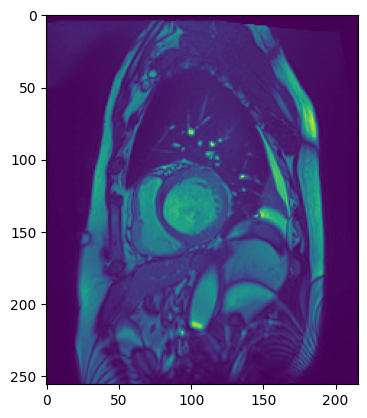

In [83]:
plt.imshow(data_array[:,:,2].T)

In [97]:
dic = {'image':np.arange(6),'label':np.arange(7)}

In [98]:
np.save('dic_try.npy',dic)

In [101]:
gg = np.load('dic_try.npy',allow_pickle = True)

In [107]:
import pickle

In [108]:
with open('picle_try.pkl','wb') as some_file:
    pickle.dump(dic,some_file)

In [ ]:
with open('pickle_try

In [170]:
sum = 0
for files in os.listdir(train_save_files):
    
    file_name = os.path.join(train_save_files,files)
    file = np.load(file_name)[0]
    sum += np.sum(file)    
    
    

In [173]:
h,w = file.shape
num_files = len(os.listdir(train_save_files))
mean_files = sum/(h*w*num_files)

In [174]:
mean_files

89.52309279444778

In [176]:
std_sum = 0
for files in os.listdir(train_save_files):

    file_name = os.path.join(train_save_files,files)
    file = np.load(file_name)[0]
    values = (file.flatten() - mean_files)**2
    std_sum +=np.sum(values)

In [181]:
import math

In [182]:
std_files = math.sqrt(std_sum/(h*w*num_files))

In [183]:
mean_files,std_files

(89.52309279444778, 100.9793319871368)

In [187]:
[0]*4

[0, 0, 0, 0]

In [192]:
# computing class weights for class imbalance
class_freq = [0]*4
for files in os.listdir(train_save_files):
    filepath = os.path.join(train_save_files,files)
    img = np.load(filepath)[1]
    img = img.astype(np.int32)
    unique_values,frequencies = np.unique(img,return_counts=True)
    for value,frequency in zip(unique_values,frequencies):
        class_freq[value] = class_freq[value] + frequency
    

In [198]:
len(class_freq)

4

In [202]:
class_freq_2 = np.array(class_freq)
target_weight = np.sum(class_freq_2) / (len(class_freq)*class_freq_2)
normalized_weights = target_weight/np.sum(target_weight)

In [205]:
target_weight

array([ 0.25983551, 20.64092177, 19.20679583, 19.6467816 ])

In [203]:
normalized_weights

array([0.0043484 , 0.3454297 , 0.32142933, 0.32879258])

In [204]:
np.sum(normalized_weights)

1.0

In [194]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
class_weights = compute_class_weight('balanced',len(class_freq),

In [ ]:
class SegDataNp(Dataset):

    def __init__(self,image_paths,img_mean,img_std,transform = None):
        super().__init__()
        self.image_paths = image_paths
        self.transform = transform
        self.img_mean = img_mean
        self.img_std = img_std

    
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        
        image = Image.open(self.image_paths[index]).convert('RGB')
        mask = Image.open(self.mask_paths[index]).convert('L')

        file =  np.load(self.image_paths[index])

        image = file[0]
        mask = file[1]

        image = torch.from_numpy(image).to(torch.float32)
        mask = torch.from_numpy(mask).to(torch.long)

        image = torch.unsqueeze(torch.unsqueeze(image,dim=0),dim=0)
        mask = torch.unsqueeze(torch.unsqueeze(mask,dim=0),dim=0)
        
        basic_image_transform = transforms.Compose(transforms=[
            transforms.Resize(size = (128,128)),
            transforms.Normalize(mean = self.img_mean,std = self.img_std),
        ])

        basic_mask_transform = transforms.Compose(transforms=[
            transforms.Resize(size = (128,128)),
            transforms.Lambda(lambda x: x/torch.max(x)),
        ])

        image = basic_image_transform(image)
        mask = basic_mask_transform(mask)

        image = image.squeeze()
        mask = mask.squeeze()

        if self.transform:

            image = self.transform(image)
            mask = self.transform(mask)
        
        sample = {'image':image,'mask':mask}

        return sample

In [ ]:
def train():

    seed = 13
    torch.manual_seed(seed)
    best_v_loss = 1_000_000

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if use_cuda else "cpu")
    
    model = TransUNet(img_dim=128,
                          in_channels=1,
                          out_channels=128,
                          head_num=4,
                          mlp_dim=512,
                          block_num=8,
                          patch_dim=16,
                          class_num=4)
    model.to(device)
    epochs = 30
    loss_func = torch.nn.CrossEntropyLoss(weight = torch.tensor([0.0043484 , 0.3454297 , 0.32142933, 0.32879258]) # calculated class imbalance weight
    loss_func.to(device)
#     optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
    optimizer = torch.optim.SGD(model.parameters(),lr = 0.01,momentum = 0.9, weight_decay = 1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer = optimizer,factor = 0.8,min_lr=1e-4)
    pth = os.getcwd()
    model_path = os.path.join(pth,'model_q3_transunet')
    log_dir = os.path.join(model_path,'runs')
    wts_path = os.path.join(model_path,'weigths')

    if os.path.exists(model_path) == False:
        os.mkdir(model_path)
        
        os.mkdir(log_dir)
        
        os.mkdir(wts_path)
    
    writer = SummaryWriter(log_dir=log_dir)

    #splitting the dataset into traininig and validation set
    train_img,valid_img = train_test_split(total_input_files,test_size=0.2,random_state=seed)
    train_data = SegData(image_paths = train_img,img_mean=90,img_std=101) # calculated mean and std of the bianry images.
    valid_data = SegData(image_paths = valid_img,img_mean=90,img_std=101)
    train_dataloader = DataLoader(train_data,batch_size = 8,shuffle = True,pin_memory = True)
    valid_dataloader = DataLoader(valid_data,batch_size = 8,shuffle = False,pin_memory = True)

    #print("After Model to device : ",torch.cuda.memory_allocated(device)/(1024*1024))
    for e in tqdm(range(epochs)):

        #training the model 
        print('Epoch {0}'.format(e+1))
        epoch_loss = 0.0
        run_loss = 0.0
        model.train(True)

        for i,batch in enumerate(train_dataloader):
            
            image = batch['image'].to(device)
            mask = batch['mask'].to(device)
    
            #print(batch['image'].shape)
            v_img = transforms.RandomVerticalFlip(p=1)(image)
            h_img = transforms.RandomHorizontalFlip(p=1)(image)
            r_img = transforms.RandomRotation(degrees=(-25,25))(image)
            image_final = torch.cat((image,v_img,h_img,r_img),0)

            #print(image_final.shape)
                    
            v_mask = transforms.RandomVerticalFlip(p=1)(mask)
            h_mask = transforms.RandomHorizontalFlip(p=1)(mask)
            r_mask = transforms.RandomRotation(degrees=(-25,25))(mask)
            mask_final = torch.cat((mask,v_mask,h_mask,r_mask),0)
            mask_final = torch.unsqueeze(mask_final,1)
            #print(mask_final.shape)
            
#             image_final.to(device)
#             mask_final.to(device)
            
#             print(image_final.dtype)
#             print(mask_final.dtype)
#             print(device)
            #a = torch.cuda.memory_allocated(device)/(1024*1024)
            optimizer.zero_grad()
            pred = model.forward(image_final)
            #print("after forward pass", torch.cuda.memory_allocated(device)/(1024*1024))
            #b = torch.cuda.memory_allocated(device)/(1024*1024)
            #print("memory consumed by forward_pass",b-a)
            loss = loss_func(pred,mask_final)
            

            run_loss = run_loss + loss.item()
            epoch_loss = epoch_loss + loss.item()
            
            loss.backward()
            #print("memory after backward pass ", torch.cuda.memory_allocated(device)/(1024*1024))
            optimizer.step()
            #print("memory after optimizer ",torch.cuda.memory_allocated(device)/(1024*1024))

            #print('the current loss is {0}'.format(run_loss))
            
            #break
            
#             del mask_final
#             del image_final
#             del pred
#             del v_img
#             del h_img
#             del r_img
#             del v_mask
#             del h_mask
#             del r_mask
#             del mask
#             del image
            
            #print("memory after delete ",torch.cuda.memory_allocated(device)/(1024*1024))
            

            if(i%100 == 99):
                
#                 for obj in gc.get_objects():
#                     try:
#                         if torch.is_tensor(obj) or (hasattr(obj,'data') and torch.is_tensor(obg.data)):
#                             print(type(obj),obj.size())
#                     except:
#                         pass
                

                print("\tBatch Loss for curent for {0} is {1:.5f}".format(i,run_loss/100))
                run_loss = 0.0
                

        avg_e_loss = epoch_loss/(i+1)
        print('The average loss for the epoch is {0}'.format(avg_e_loss))

        #validating the model
        model.train(False)

        val_loss = 0.0

        for k,batch in enumerate(valid_dataloader):
            final_image = batch['image'].to(device)
            final_mask = torch.unsqueeze(batch['mask'],1).to(device)

            pred = model.forward(final_image)
            loss = loss_func(pred,final_mask)

            val_loss+= loss.item()
            
#             del final_image
#             del final_mask
            #break
        
        

        avg_val_loss = val_loss/(k+1)
        print('The average validation loss for the epoch is {0:.5f}'.format(avg_val_loss))
        writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_e_loss, 'Validation' : avg_val_loss },
                    e)
        
        if avg_val_loss < best_v_loss:

            best_v_loss = avg_val_loss
            best_wt_path = os.path.join(wts_path,'best_epoch'+str(e))
            

        writer.flush()
        

        #break
        wt_path =  os.path.join(wts_path,'epoch_'+str(e))
        torch.save(model.state_dict(), wt_path)
    torch.save(model.state_dict(), best_wt_path)

In [ ]:
def diceScoreMutliClass(inputs, targets):
    # Calculate intersection and union for each sample in the batch
    epsilon = 1e-6
    intersection = torch.sum(inputs * targets, dim=(1, 2, 3))  # Sum over height, width, and channels
    total = torch.sum(inputs, dim=(1, 2, 3)) + torch.sum(targets, dim=(1, 2, 3))

    # Calculate Dice coefficient with epsilon for numerical stability
    dice_coefficient = (2. * intersection + epsilon) / (total + epsilon)

    return torch.mean(dice_coefficient)

In [ ]:
def diceScoreMulti(inputs,targets,num_class = 4):
    epsilon = 1e-6
    inputs = torch.nn.Softmax(dim = 1)
    _,y_pred_idx = torch.max(inputs,dim = 1)
    dice_scores = []
    for class_idx in range(num_class):
        y_true_class = (y_true == class_idx).float()
        y_pred_class = (y_pred_idx == class_idx).float()

        intersection = torch.sum(y_true_class * y_pred_class, dim = (1,2))
        total = torch.sum(y_true_class,dim = (1,2)) + torch.sum(y_pred_class,dim= (1,2))
        dice = (2. * intersection + epsilon)/(total+epsilon)
        dice_scores.append(dice.item())
    average_dice = torch.mean(torch.tensor(dice_scores))
    return average_dice
    